### Downloading market data from Yahoo and returns calculations

* Download market data for Apple and Tesla stock from Yahoo from 2001-2020
* Calculate the monthly returns for each stock
* Select only 2019 monthly returns
* Plot the monthly returns as a bar chart and then as a line chart
* Do the same thing for annual data for the full sample
* Plot daily time series of Apple and Tesla stock from 2011 onwards
    * This makes it easier to compare relative performance
    * Rebase each time series so it starts from 100

In [6]:
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator
from chartpy import Chart, Style

In [23]:
md_request = MarketDataRequest(
    start_date='01 Jan 2001',
    finish_date='01 Jan 2020',
    tickers=['Apple', 'Tesla'],
    vendor_tickers=['aapl', 'tsla'],
    fields=['close'],
    vendor_fields=['close'],
    data_source='yahoo',
)

market = Market(market_data_generator=MarketDataGenerator())

df_yahoo = market.fetch_market(md_request)

2022-05-11 23:46:49,275 - findatapy.market.datavendorweb - INFO - Request Yahoo data
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
2022-05-11 23:46:49,833 - findatapy.market.datavendorweb - INFO - Completed request from Yahoo.
2022-05-11 23:46:49,845 - findatapy.market.ioengine - WARNING - Couldn't push MarketDataRequest_807__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__category-None__category_key-backtest_default-cat_yahoo_daily_NYC__cut-NYC__data_engine-None__data_source-yahoo__environment-backtest__expiry_date-NaT__fields-close__finish_date-2020-01-01 00:00:00__freeform_md_request-{}__freq-daily__freq_mult-1__fx_forwards_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__fx_vol_part-V_25R_10R_25B_10B__fx_vol_tenor-ON_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__gran_freq-None__list_thre

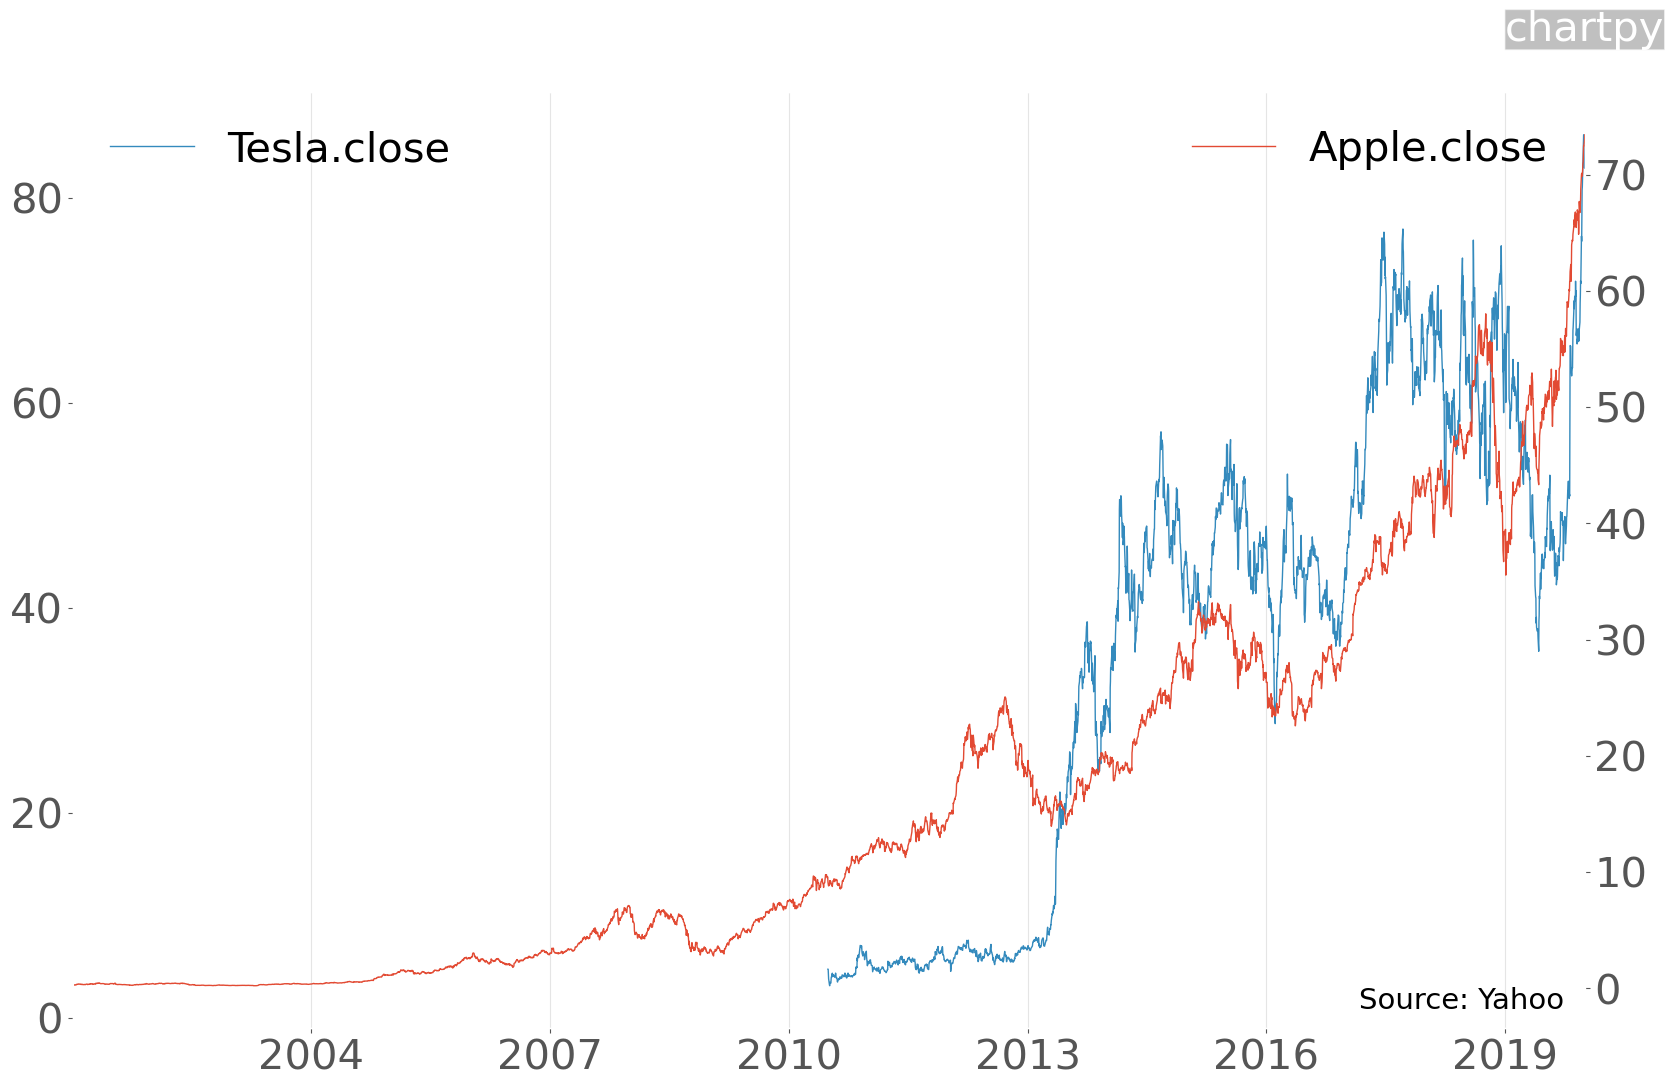

In [24]:
Chart(engine='matplotlib').plot(df_yahoo, style=Style(
    source='Yahoo', y_axis_2_series=['Apple.close', 'Apple.adj close'],
    y_axis_showgrid=False, y_axis_2_showgrid=False))

In [ ]:
df_yahoo = df_yahoo.fillna(method='ffill')

In [25]:
df_yahoo_monthly = df_yahoo.resample('M').last()
df_yahoo_monthly_ret = (df_yahoo_monthly / df_yahoo_monthly.shift(1) - 1) * 100
df_yahoo_monthly_ind = 10.0 * (1.0 + df_yahoo_monthly_ret).cumprod()

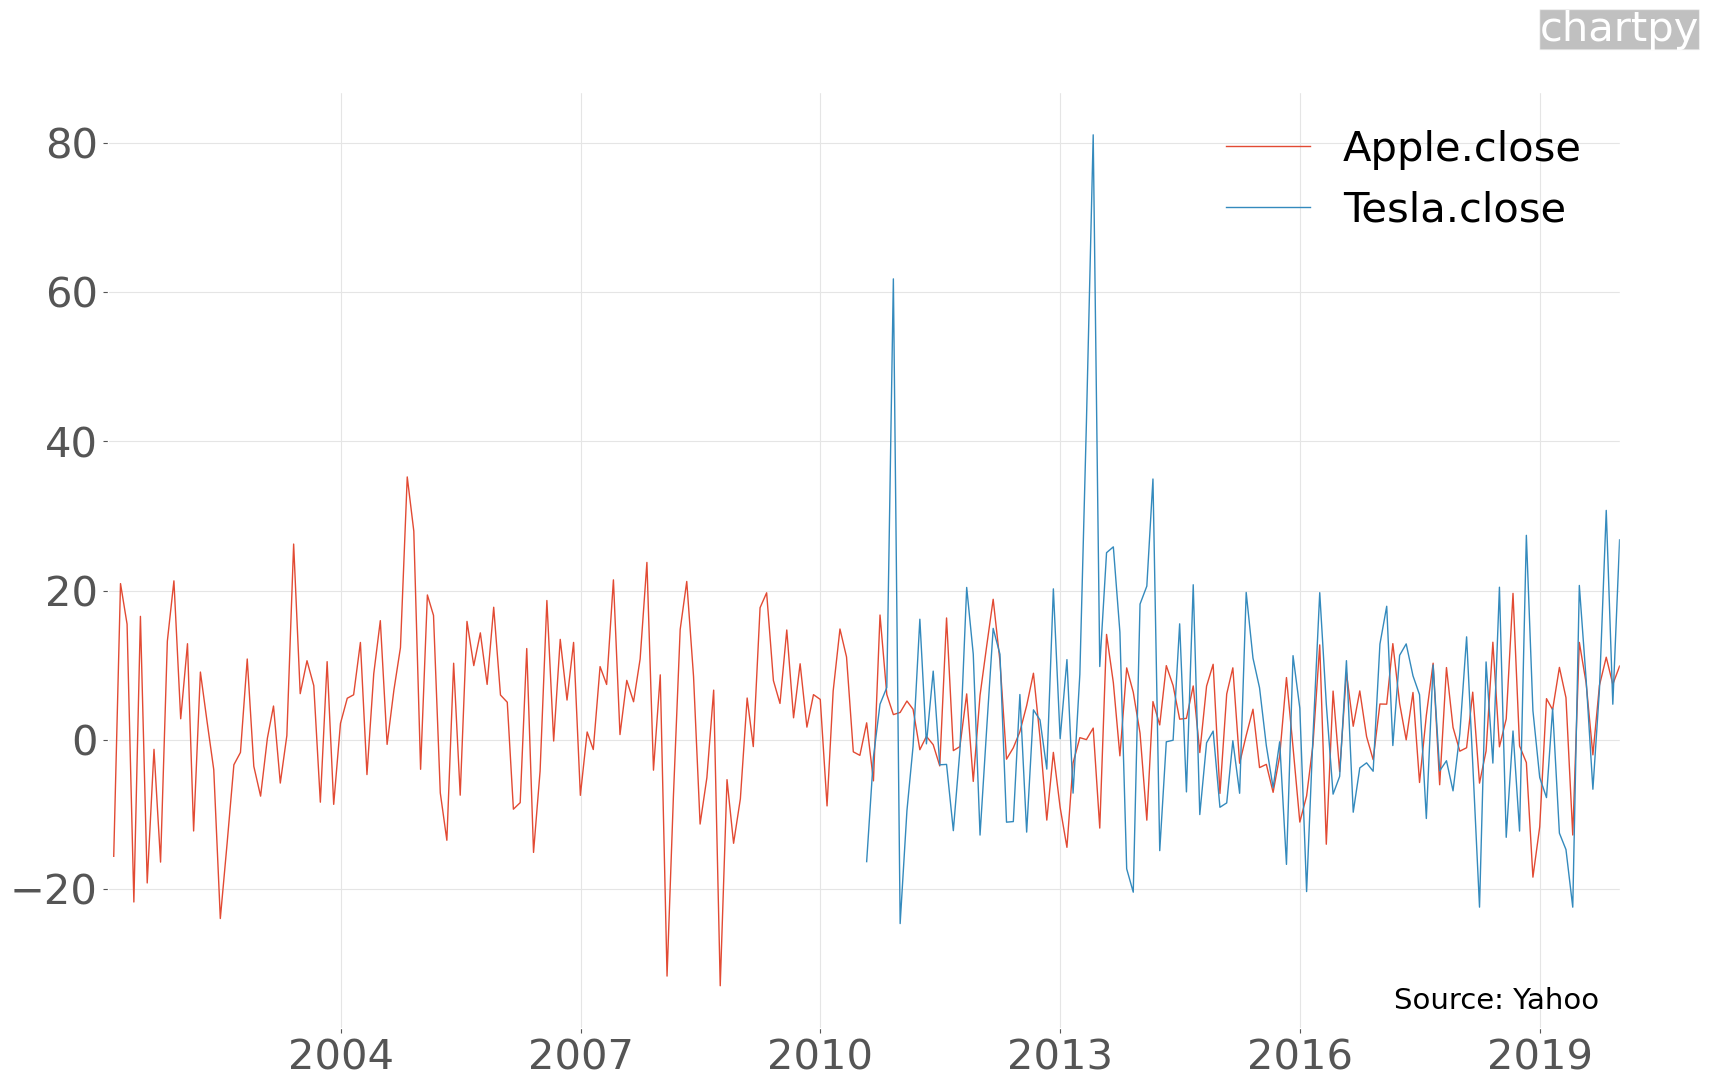

In [27]:
Chart(engine='matplotlib').plot(df_yahoo_monthly_ret, style=Style(source='Yahoo'))

In [28]:
df_yahoo_monthly_ret

,Apple.close,Tesla.close
Date,,
2001-01-31,NaN,NaN
2001-02-28,-15.606957,NaN
2001-03-31,20.931412,NaN
2001-04-30,15.496302,NaN
2001-05-31,-21.734089,NaN
...,...,...
2019-08-31,-2.018392,-6.622237
2019-09-30,7.296157,6.763875
2019-10-31,11.068439,30.742729


In [29]:
df_yahoo_2019_ret = df_yahoo_monthly_ret[df_yahoo_monthly_ret.index>'2018-12-31']

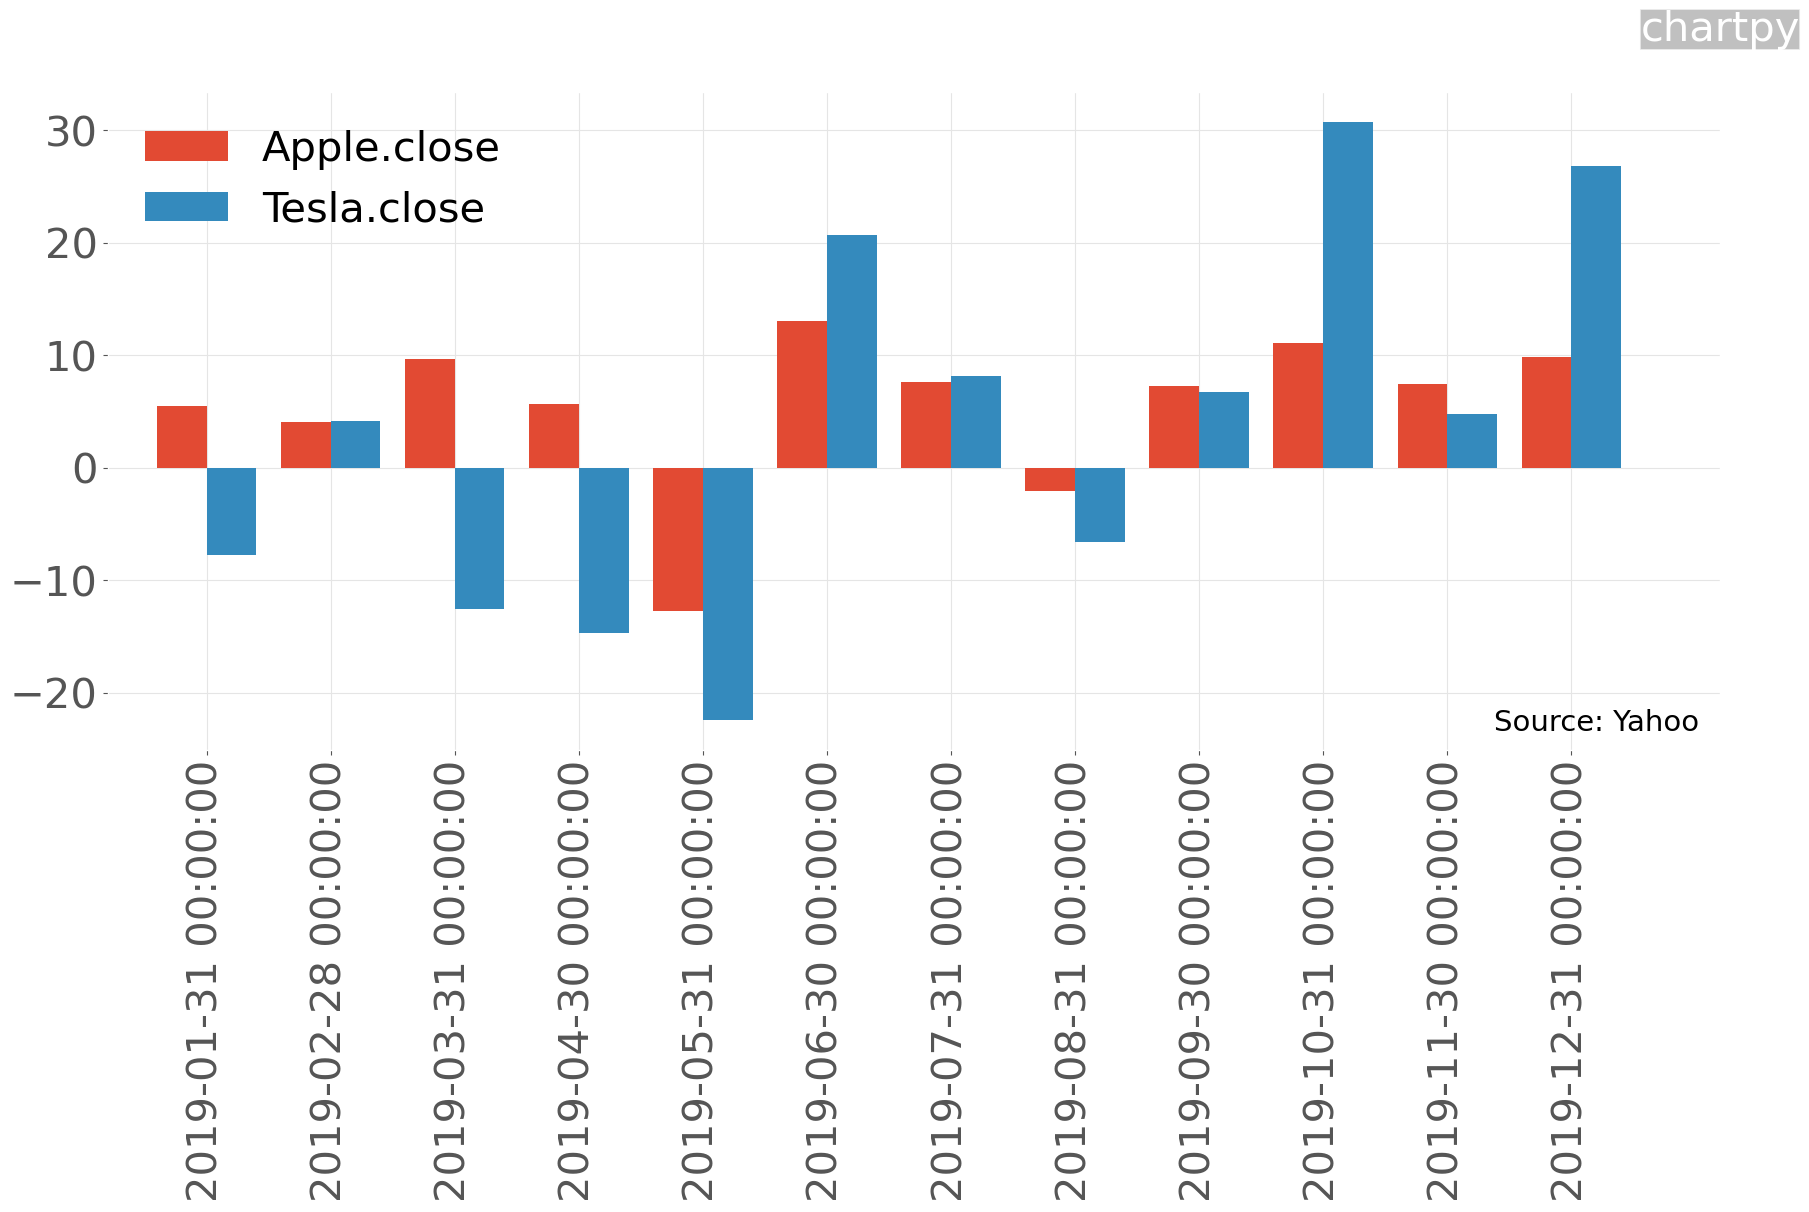

In [30]:
Chart(chart_type='bar',engine='matplotlib').plot(df_yahoo_2019_ret, style=Style(source='Yahoo'))

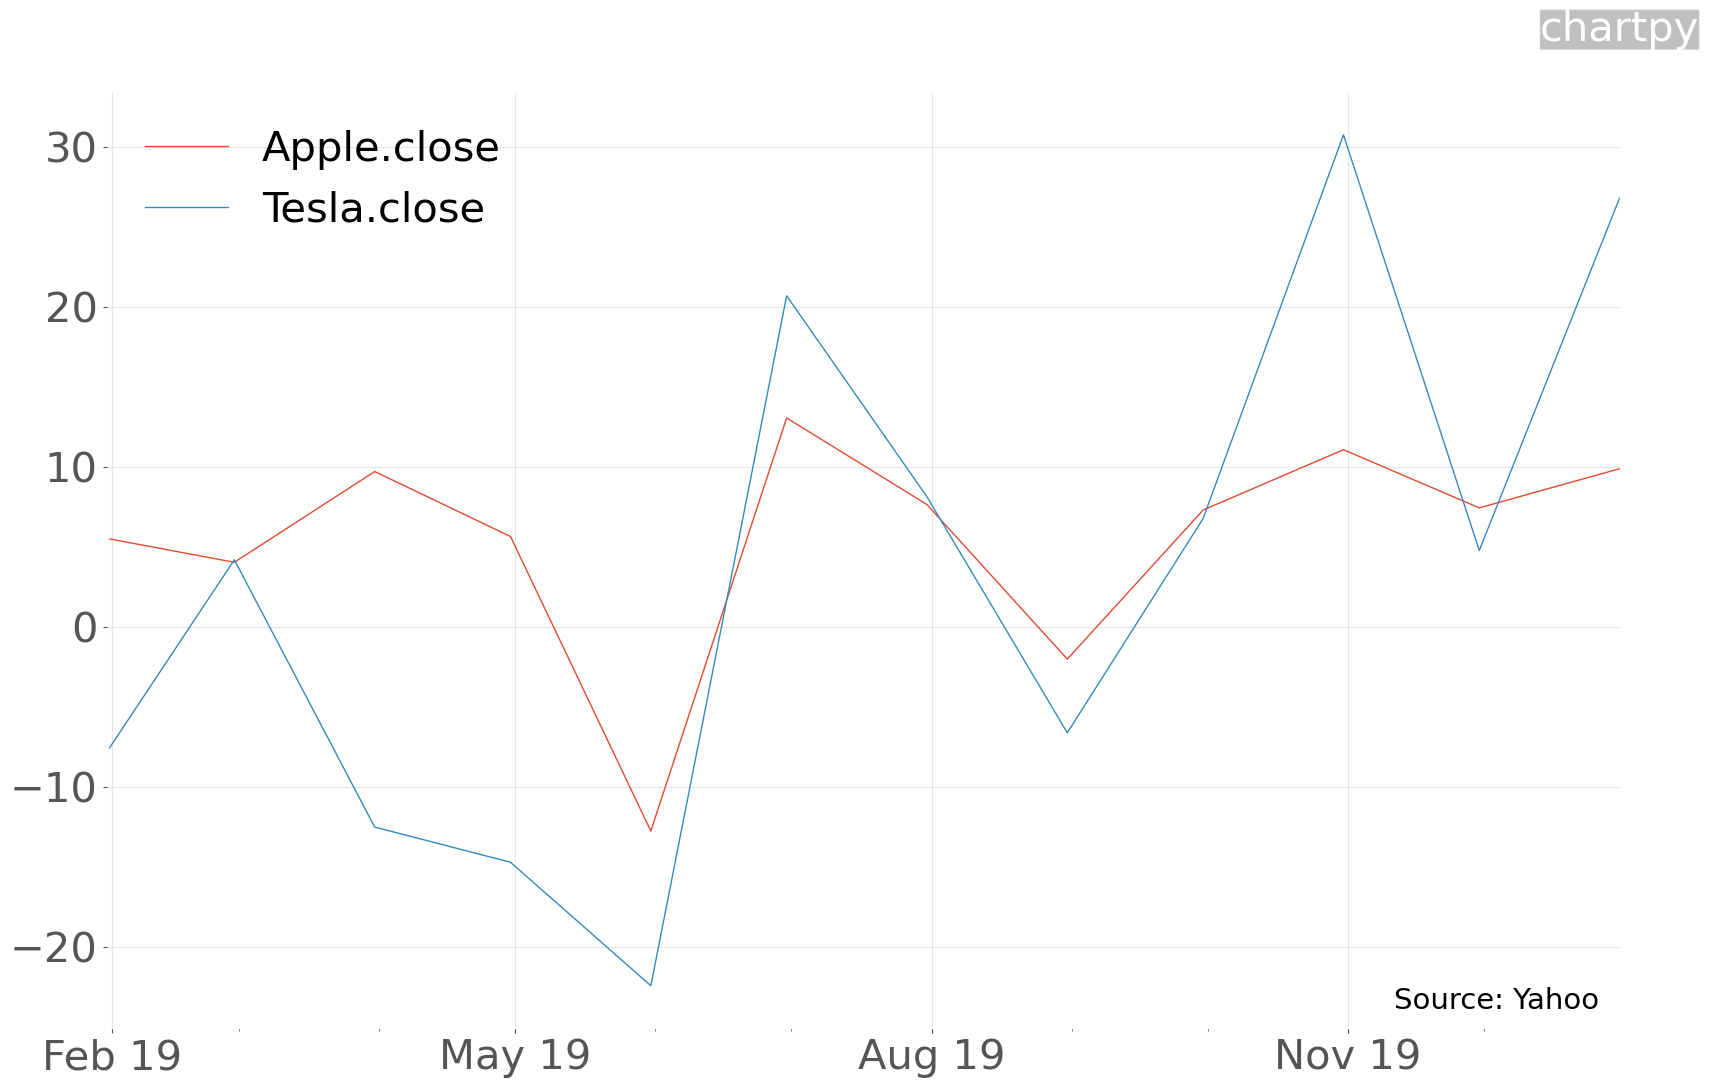

In [31]:
Chart(engine='matplotlib').plot(df_yahoo_2019_ret, style=Style(source='Yahoo'))

# Yearly returns

In [32]:
df_yahoo_yearly = df_yahoo.resample('Y').last()
df_yahoo_yearly_ret = (df_yahoo_yearly / df_yahoo_yearly.shift(1) - 1) * 100
df_yahoo_yearly_ind = 10.0 * (1.0 + df_yahoo_yearly_ret).cumprod()

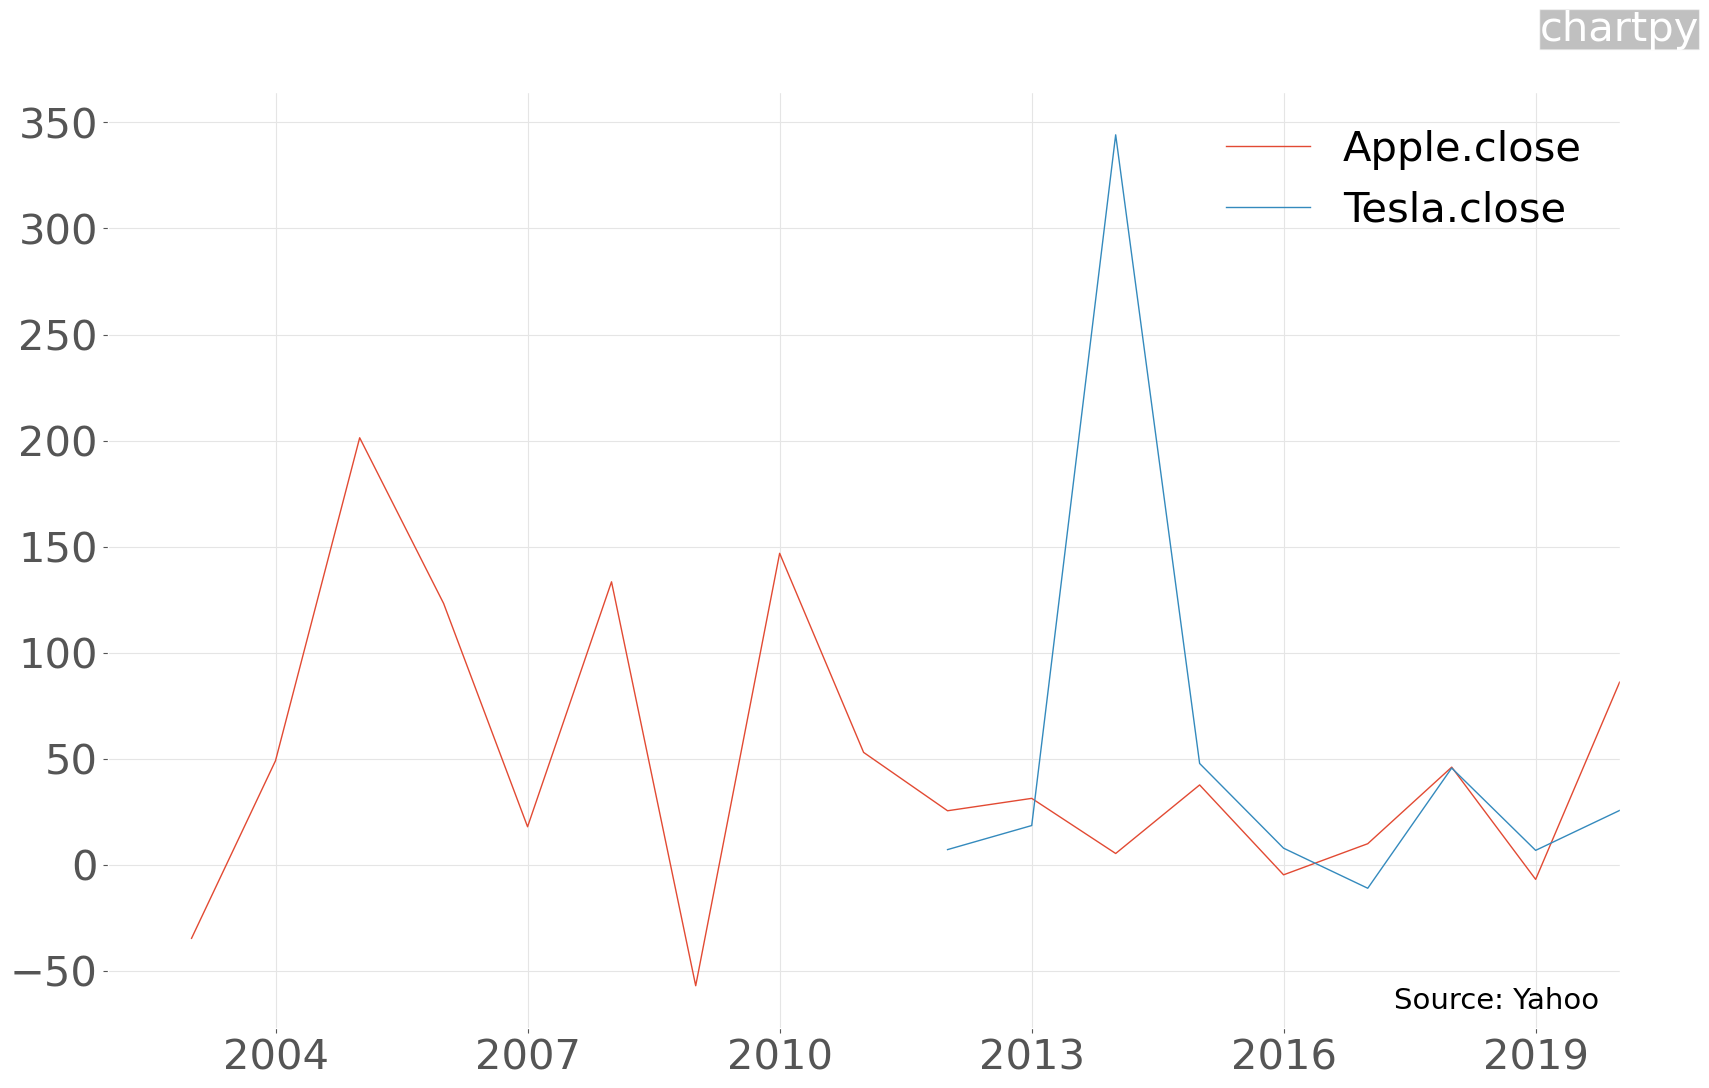

In [33]:
Chart(engine='matplotlib').plot(df_yahoo_yearly_ret, style=Style(source='Yahoo'))

# After 2011

In [34]:
df_yahoo_2011_onwards = df_yahoo[df_yahoo.index > '2010-12-31']

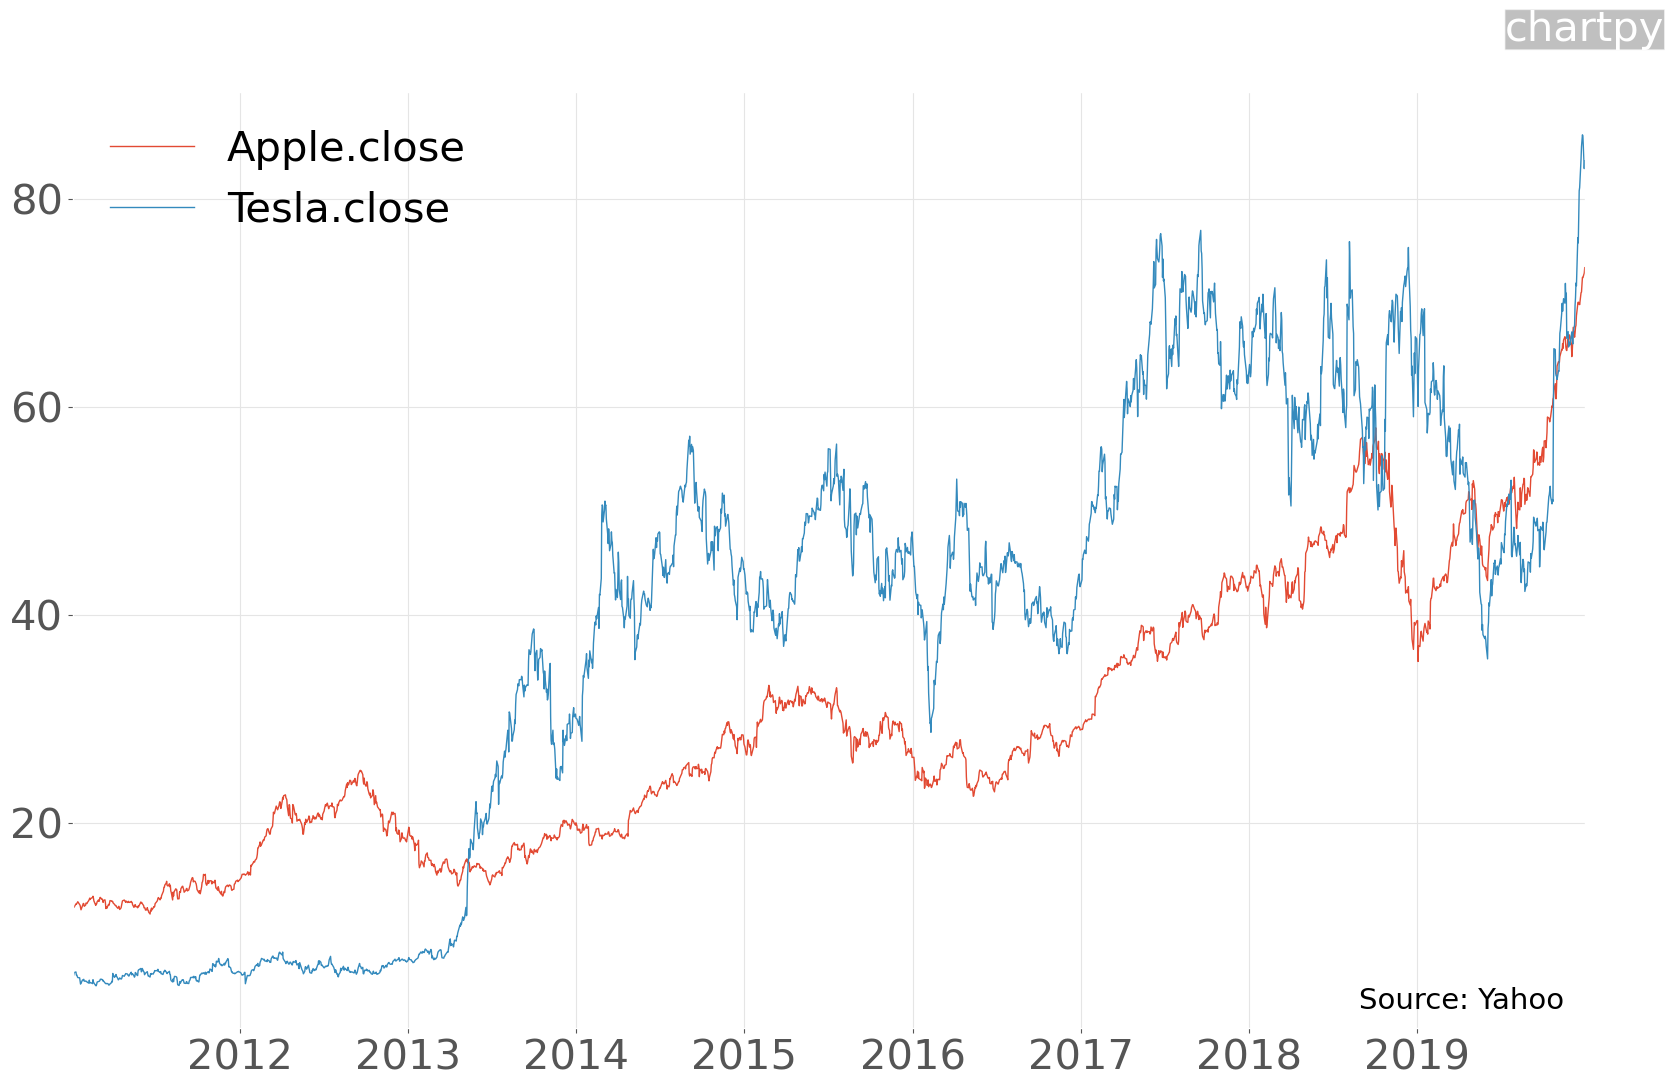

In [35]:
Chart(engine='matplotlib').plot(df_yahoo_2011_onwards, style=Style(source='Yahoo'))

In [36]:
df_yahoo_2011_onwards_ret = (df_yahoo_2011_onwards / df_yahoo_2011_onwards.shift(1) - 1) * 100
df_yahoo_2011_onwards_ind = 100.0 * (1.0 + df_yahoo_2011_onwards_ret).cumprod()

2022-05-12 10:00:31,368 - matplotlib.font_manager - WARNING - findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.


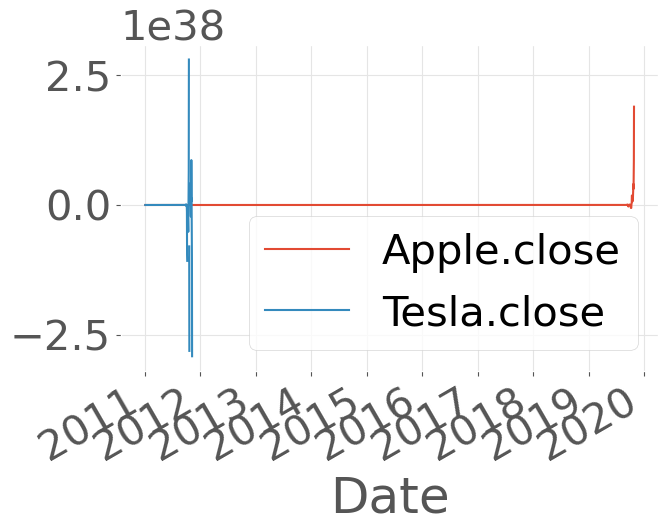

In [37]:
df_yahoo_2011_onwards_ind.plot()

In [39]:
df_yahoo_2011_onwards_ind

,Apple.close,Tesla.close
Date,,
2011-01-03,NaN,NaN
2011-01-04,152.189819,118.783806
2011-01-05,276.681458,190.044678
2011-01-06,254.317337,933.790955
2011-01-07,436.446625,2139.538574
...,...,...
2019-12-24,-inf,-inf
2019-12-26,-inf,-inf
2019-12-27,-inf,-inf


### Relationship between US stocks and US growth

* Download data for S&P500 (or Dow Jones Industrial Average) for United States and US GDP (from ALFRED/FRED) for as long as the history goes back. Should be many decades for both time series.
* Calculate quarter on quarter % changes for US GDP and quarterly returns for S&P500
* Plot the time series of both 
* Do a scatter plot of both with chartpy (and plot line of best fit with chartpy)
* If you have time, use scikit-learn or statsmodels to do a contemporaneous linear regression of the two variables (ie. regress Q1 changes in US GDP vs. Q1 returns for S&P500) using a training set
    * Use GDP quarter-on-quarter changes as your $x$ value and S&P500 quarterly returns as your $y$ value to be predicted
    * Keep the last 4 years as a test set
* You can also try using DJIA instead of S&P500

In [57]:
md_request = MarketDataRequest(
    start_date='01 Jan 2012',
    tickers=['S&P 500'],
    vendor_tickers=['SP500'],
    fields=['close'],
    data_source='alfred',
    fred_api_key='28bc50d86315abcf83829a8d6b48d033',
)
df_fred_sp500 = market.fetch_market(md_request)

2022-05-12 17:54:23,830 - findatapy.market.datavendorweb - INFO - Request ALFRED/FRED data
2022-05-12 17:54:24,931 - findatapy.market.datavendorweb - INFO - Completed request from ALFRED/FRED for ['S&P 500.close']
2022-05-12 17:54:24,938 - findatapy.market.ioengine - WARNING - Couldn't push MarketDataRequest_803__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__category-None__category_key-backtest_default-cat_alfred_daily_NYC__cut-NYC__data_engine-None__data_source-alfred__environment-backtest__expiry_date-NaT__fields-close__finish_date-2022-05-11 21:26:43_962752__freeform_md_request-{}__freq-daily__freq_mult-1__fx_forwards_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__fx_vol_part-V_25R_10R_25B_10B__fx_vol_tenor-ON_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__gran_freq-None__list_threads-1__old_tickers-S&P 500__push_to_cache-True__resample-None__resample_how-last__split_request_

In [60]:
df_fred_sp500.index.min()

Timestamp('2012-05-14 00:00:00')

In [65]:
md_request = MarketDataRequest(
    start_date='01 Jan 1800',
    tickers=['US GDP'],
    vendor_tickers=['GDP'],
    fields=['close'],
    data_source='alfred',
    fred_api_key='28bc50d86315abcf83829a8d6b48d033',
)
df_fred_gdp = market.fetch_market(md_request)

2022-05-12 17:55:29,004 - findatapy.market.datavendorweb - INFO - Request ALFRED/FRED data
2022-05-12 17:55:29,627 - findatapy.market.datavendorweb - INFO - Completed request from ALFRED/FRED for ['US GDP.close']
2022-05-12 17:55:29,634 - findatapy.market.ioengine - WARNING - Couldn't push MarketDataRequest_799__abstract_curve_key-None__base_depos_currencies-EUR_GBP_AUD_NZD_USD_CAD_CHF_NOK_SEK_JPY__base_depos_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__category-None__category_key-backtest_default-cat_alfred_daily_NYC__cut-NYC__data_engine-None__data_source-alfred__environment-backtest__expiry_date-NaT__fields-close__finish_date-2022-05-11 21:26:43_962752__freeform_md_request-{}__freq-daily__freq_mult-1__fx_forwards_tenor-ON_TN_SN_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__fx_vol_part-V_25R_10R_25B_10B__fx_vol_tenor-ON_1W_2W_3W_1M_2M_3M_4M_6M_9M_1Y_2Y_3Y_5Y__gran_freq-None__list_threads-1__old_tickers-US GDP__push_to_cache-True__resample-None__resample_how-last__split_request_ch

In [66]:
df_fred_gdp.index.min()

Timestamp('1947-01-01 00:00:00')

In [68]:
df_fred_sp500_q = df_fred_sp500.resample('Q').last()
df_fred_sp500_q_change = (df_fred_sp500_q / df_fred_sp500_q.shift(1) -1)*100
df_fred_gdp_q = df_fred_gdp.resample('Q').last()
df_fred_gdp_q_change = (df_fred_gdp_q / df_fred_gdp_q.shift(1) -1)*100

2022-05-12 18:09:35,370 - matplotlib.legend - WARNING - No handles with labels found to put in legend.
2022-05-12 18:09:35,502 - matplotlib.font_manager - WARNING - findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.


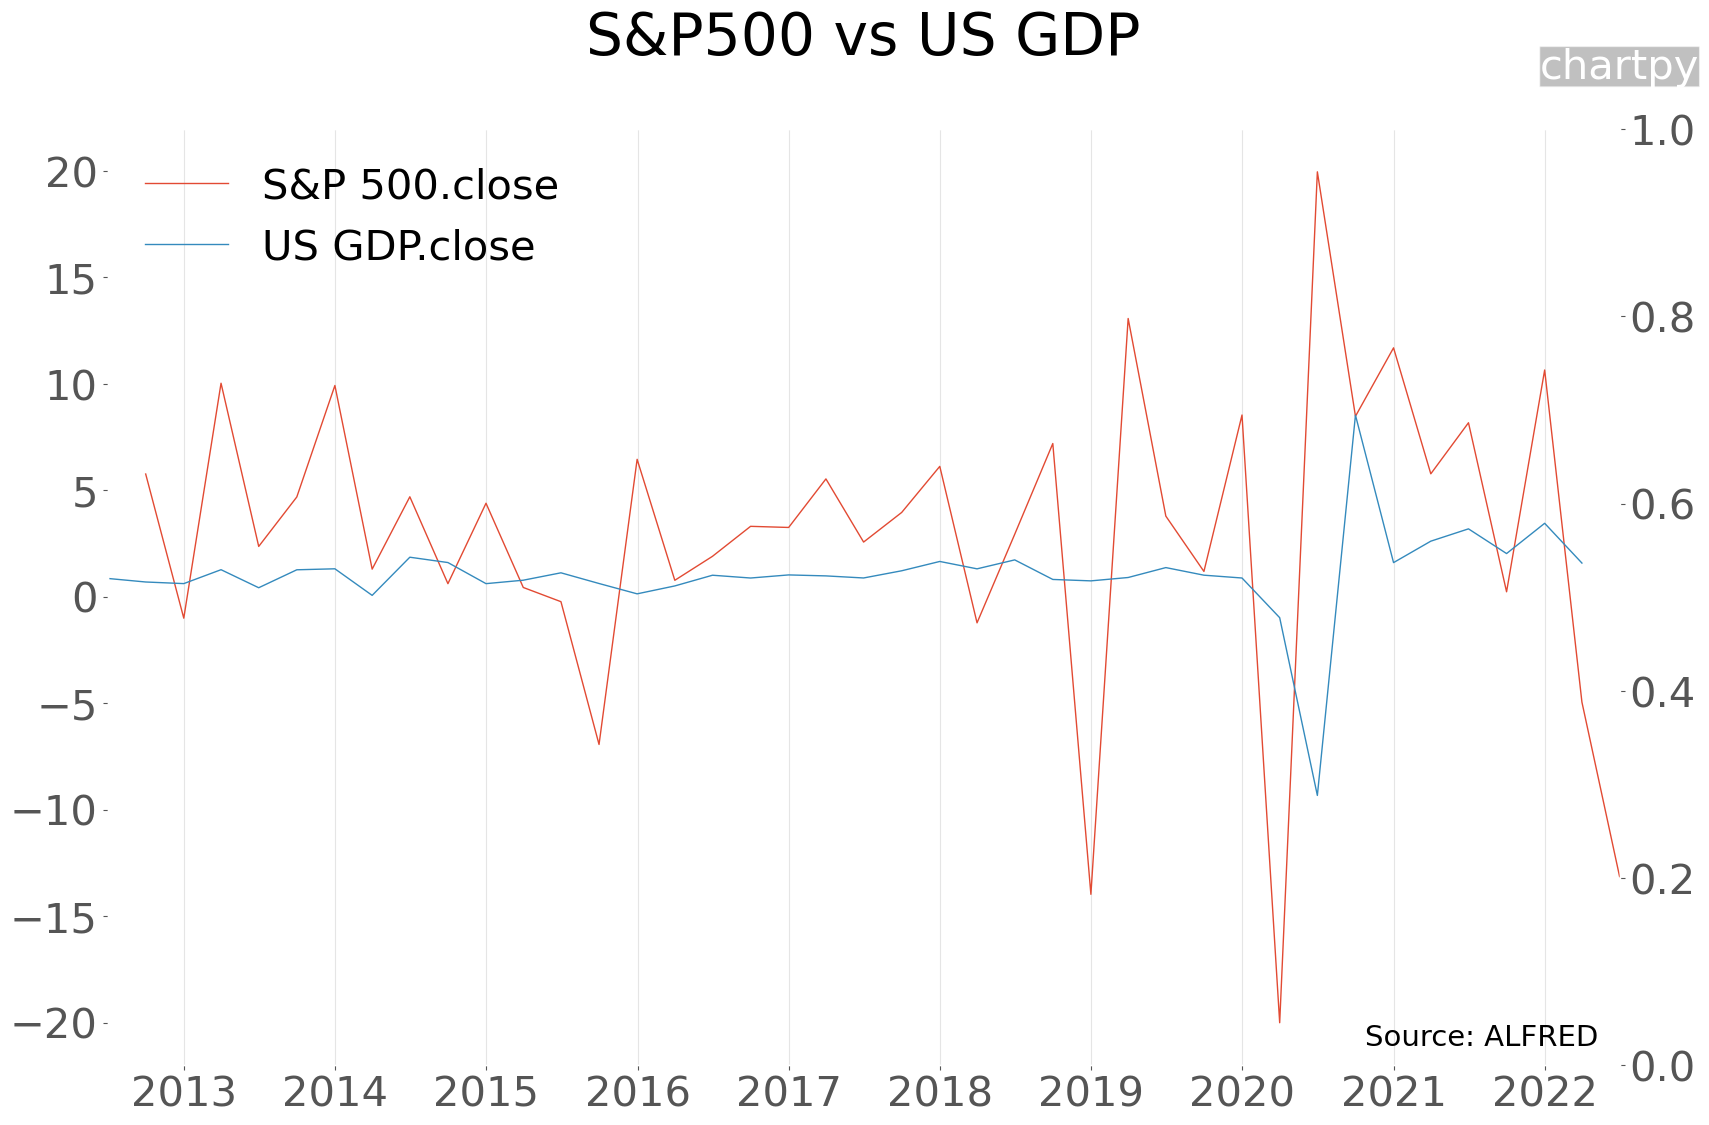

In [69]:
df = df_fred_sp500_q_change.join(df_fred_gdp_q_change)
style = Style(title='S&P500 vs US GDP',
             y_axis_2_series='US GDP (QoQ % change)',
             y_axis_showgrid=False,
             y_axis_2_showgrid=False,
             source='ALFRED')
Chart(engine='matplotlib').plot(df, style=style)

### Create your own trading strategy

* Download FX data from Quandl for EUR/USD (either using the Quandl library or findatapy)
* Come up with a signal for your trading strategy
    * Trend? Whatever you want?!
    * Try using different technical indicators (eg. Bollinger bands, or whatever you'd like)
    * You can implement technical indicatiors directly using Pandas (we showed how to a simple moving average earlier with Pandas) or you can use another library which has built-in technical indciators using finmarketpy
    * Using the technical indicator you need to create a trading signal (ie. +1 or -1)
* Implement a backtest using Pandas
* Visualise the returns with Matplotlib (or Plotly)
* How do the results change, when you change the parameters?
* For simplicity assume that spot returns are the same as total returns
* Also try implementing the same backtest in finmarketpy and try it with other currency pairs too if you have time.

### If you have more time left... can do an FX example of the first exercise

* Download market data for EUR/USD, USD/JPY, GBP/USD from Quandl between 2000-2019 using findatapy or using Quandl API directly
* Invert USD/JPY (ie. JPY/USD)
* Calculate the daily returns of each time series in the dataset
* Make 2000-2018 returns, the training set and 2019 the test set for returns
* Plot the training set returns of each time series for 2018 (will look quite noisy!)
* Do a linear regression between in the training set with scikit-learn or statsmodels with $y$ variable as GBP/USD daily returns and the $x$ variables as JPY/USD and EUR/USD
* Using these coefficients, do a scatter plot of the expected output of GBP/USD returns vs. actual GBP/USD returns in the test set (ie. 2019)